<h1 align="center" style="color:yellow">Image Processing Assignment#3</h1>

***
### Names: Abdelrahman Mahmoud Alsayed Ibrahim, Belal Ashraf Kamal
### Ids: 20190732,20190137

#### Experiment-1:
##### Apply to image "cameraman"
- Create low pass filter and apply it to the image. - Create high pass filter and apply it to the image

In [1]:
import numpy as np
import math
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.io import imshow

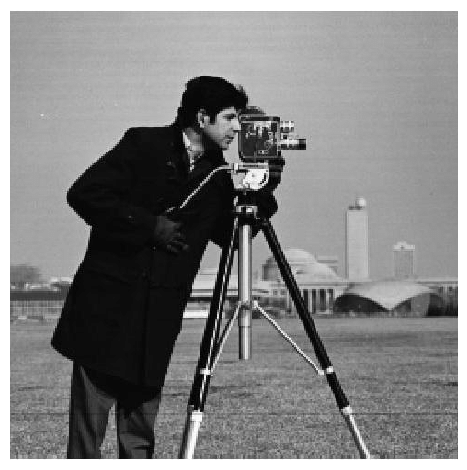

In [2]:
camera_Man = cv.imread('cameraman.png',0)
plt.figure()
plt.axis('off')
imshow(camera_Man)
plt.show()

In [3]:
# low pass filter
(lpfw,lpfh) = (3,3)
lowPassFilter = np.ones((lpfw,lpfh))*1/(lpfw*lpfh)


# high pass filter
(hpfw,hpfh) = (3,3)
highPassFilter = -1*np.ones((hpfw,hpfh))
highPassFilter[hpfw//2,hpfh//2] = -np.sum(highPassFilter)-1

print("Low Pass Filter")
print(lowPassFilter)

print("High Pass Filter")
print(highPassFilter)

Low Pass Filter
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
High Pass Filter
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


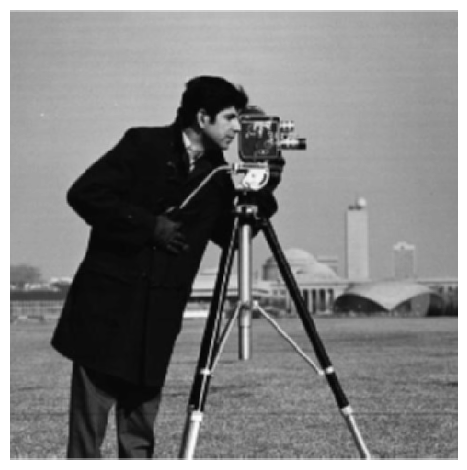

In [4]:
low_Pass_Cameraman = cv.filter2D(camera_Man,0,lowPassFilter)
plt.figure()
plt.axis('off')
imshow(low_Pass_Cameraman)
plt.show()

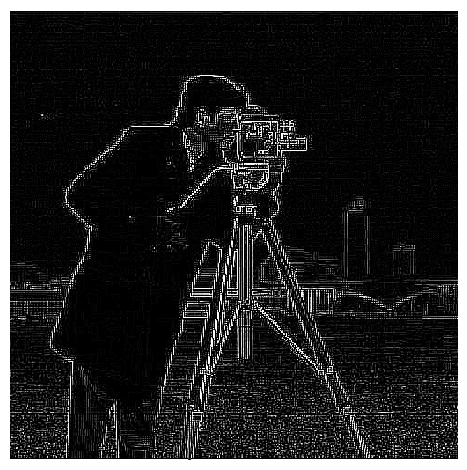

In [5]:
high_Pass_Cameraman = cv.filter2D(camera_Man,0,highPassFilter)
plt.figure()
plt.axis('off')
imshow(high_Pass_Cameraman)
plt.show()

#### Experiment-2:
##### Use image (‘eight’)
- Apply gaussian noise on the given image
- Apply adaptive wiener filter
- Show the noisy image before and after applying the filter

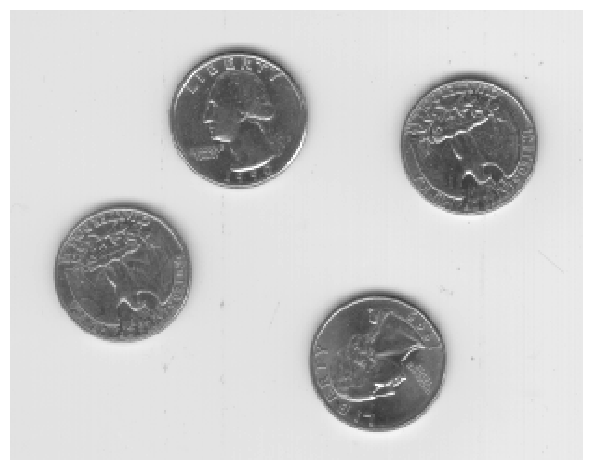

In [6]:
eight = cv.imread('eight.jpg',0)
plt.figure()
plt.axis('off')
imshow(eight)
plt.show()

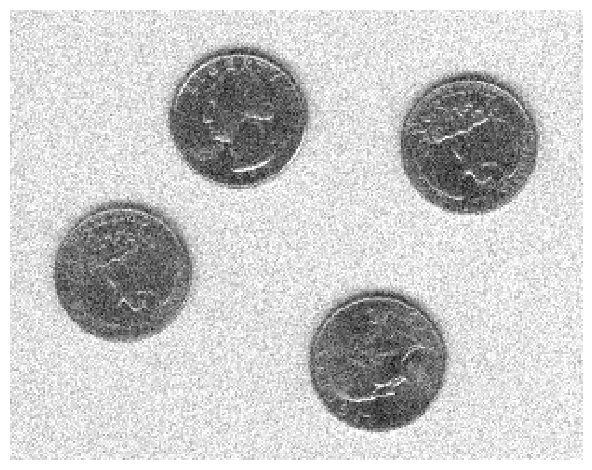

True

In [7]:
def guassian_Noise(img, sigma = 20):
    dummy = np.copy(img).astype(float)
    gauss = np.random.normal(0, sigma, np.shape(img))
    # Additive Noise
    dummy = np.round(gauss + dummy)
    # Saturate lower bound
    dummy[np.where(dummy < 0)] = 0
    # Saturate upper bound
    dummy[np.where(dummy > 255)] = 255
    return np.uint8(dummy)

noised_eight = guassian_Noise(eight)
plt.figure()
plt.axis('off')
imshow(noised_eight)
plt.show()
cv.imwrite('guassianNoise_eight.jpg',noised_eight)


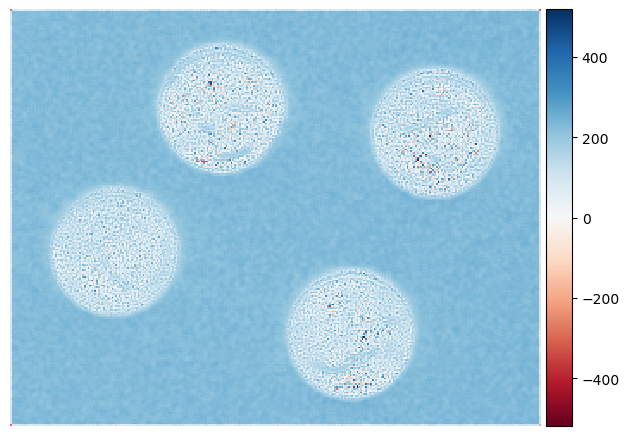

True

In [8]:
from scipy.signal import wiener

filtered_eight = wiener(noised_eight, mysize=3, noise=None)
plt.figure()
plt.axis('off')
imshow(filtered_eight)
plt.show()
cv.imwrite('filtered_eight.jpg',filtered_eight)

#### Experiment-3:
##### Use image (‘cameraman’)
- Apply salt and pepper noise - Apply arithmetic mean filter - Apply median filter
- Apply max filter
- Apply min filter

/var/folders/ks/m0btnx4d7j38phjw29dfybvw0000gn/T/ipykernel_77657/225148320.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
/var/folders/ks/m0btnx4d7j38phjw29dfybvw0000gn/T/ipykernel_77657/225148320.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


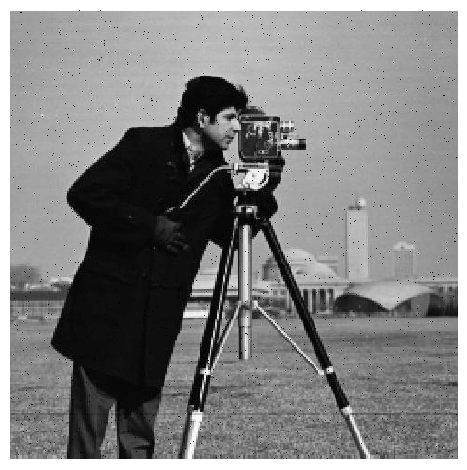

True

In [9]:
def salt_and_pepper_Noise(image):
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.007
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
s_b_noised_Cameraman = salt_and_pepper_Noise(camera_Man)
plt.figure()
plt.axis('off')
imshow(s_b_noised_Cameraman)
plt.show()
cv.imwrite('salt&pepper_noise_cameraman.jpg',s_b_noised_Cameraman)

#### MAX Filter

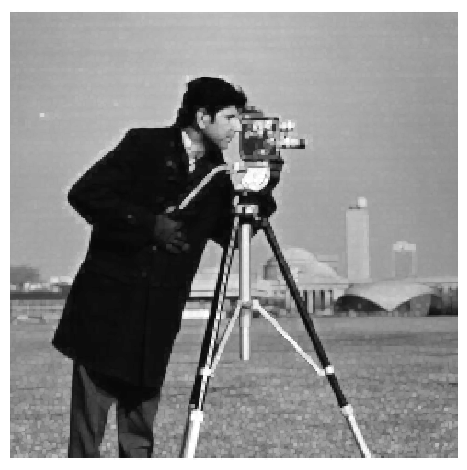

True

In [10]:
from scipy.ndimage import maximum_filter
max_filtered = maximum_filter(s_b_noised_Cameraman, size=3)
plt.figure()
plt.axis('off')
imshow(max_filtered)
plt.show()
cv.imwrite('maxFiltered_Cameraman.jpg',max_filtered)

#### MIN Filter

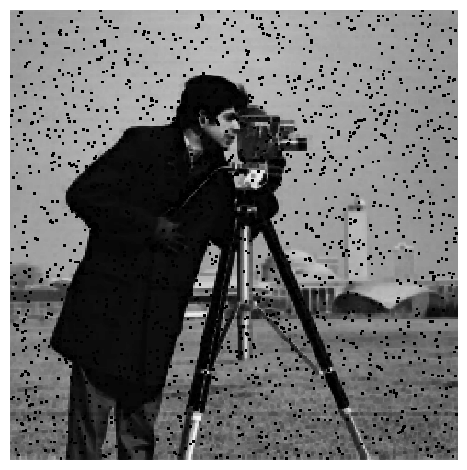

True

In [11]:
from scipy.ndimage import minimum_filter
min_filtered = minimum_filter(s_b_noised_Cameraman, size=3)
plt.figure()
plt.axis('off')
imshow(min_filtered)
plt.show()
cv.imwrite('minFiltered_Cameraman.jpg',min_filtered)

#### Mean Filter

5 by 5: 


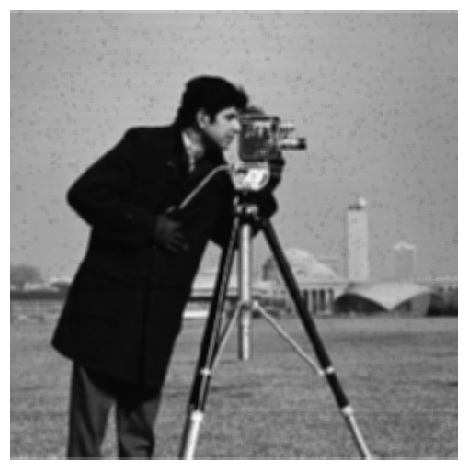

3 by 3: 


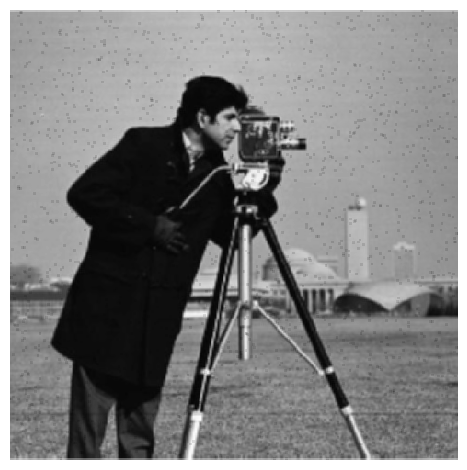

In [12]:
img_blur = cv.blur(s_b_noised_Cameraman,(5,5))
img_blur_2 = cv.blur(s_b_noised_Cameraman,(3,3))
print("5 by 5: ")
plt.figure()
plt.axis('off')
imshow(img_blur)
plt.show()

print("3 by 3: ")
plt.figure()
plt.axis('off')
imshow(img_blur_2)
plt.show()

#### Median Filter

5 by 5


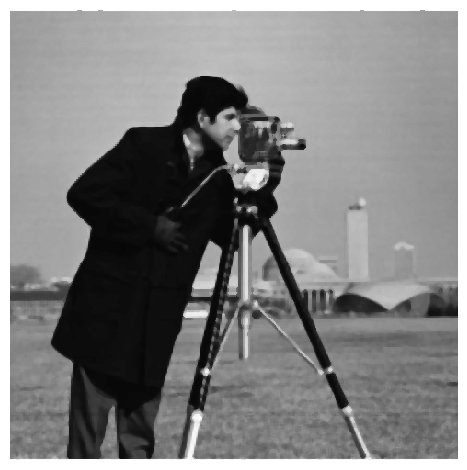

3 by 3


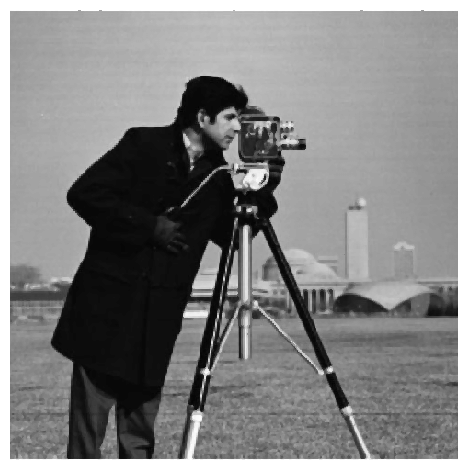

In [13]:
print("5 by 5")
image_median = cv.medianBlur(s_b_noised_Cameraman,5)
plt.figure()
plt.axis('off')
imshow(image_median)
plt.show()
print("3 by 3")
image_median_3 = cv.medianBlur(s_b_noised_Cameraman,3)
plt.figure()
plt.axis('off')
imshow(image_median_3)
plt.show()